In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
x_train = pd.read_csv(r"C:\GitHub\Evan-Machine-Learning\Udemy - Logistic Regression\titanic_train.csv")

In [90]:
x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fill Null in Age

In [91]:
pclass_age_mean = x_train.groupby('Pclass')['Age'].mean()
pclass_age_mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [92]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        # age is null
        if pclass == 1:
            return pclass_age_mean[1]
        elif pclass == 2:
            return pclass_age_mean[2]
        elif pclass == 3:
            return pclass_age_mean[3]
    else:
        # age is not null
        return age

In [93]:
x_train['Age'] = x_train[['Age', 'Pclass']].apply(fill_age, axis=1)

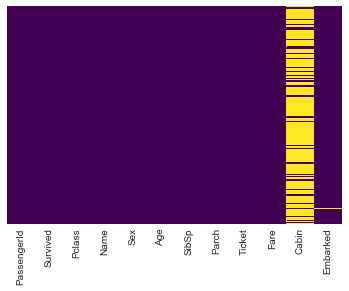

In [94]:
sns.heatmap(x_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Drop 'Cabin' Column

In [95]:
x_train.drop('Cabin', axis=1, inplace=True)

In [96]:
x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


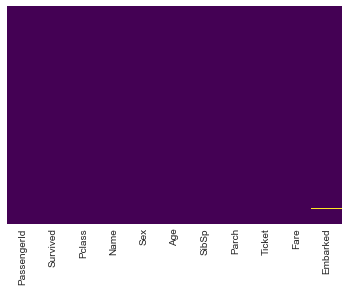

In [97]:
sns.heatmap(x_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Drop Rows that include NaN

In [98]:
x_train.dropna(inplace=True)

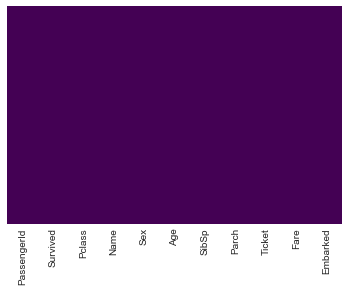

In [99]:
sns.heatmap(x_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Convert "Categorical variables" into "Indicator variables"

### Female: 0; Male: 1

In [106]:
pd.get_dummies(x_train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [107]:
sex = pd.get_dummies(x_train['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


### C: (0,0); Q: (1,0); S: (0,1)

In [108]:
x_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [109]:
pd.get_dummies(x_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [110]:
embark = pd.get_dummies(x_train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [112]:
x_train = pd.concat([x_train, sex, embark], axis=1)

In [114]:
x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


# Drop Useless Columns

In [117]:
x_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [119]:
x_train.drop('PassengerId', axis=1, inplace=True)

In [120]:
x_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
